In [1]:
from kompasssuche_test import kompasssuche_test
import numpy as np
from scipy.stats import ttest_ind, ranksums
import time
import matplotlib.pyplot as plt
import statsmodels.api as sm

### Aufgabe 3.1

In [2]:
def f(x): return x[0]**2 + x[1]**2

In [3]:
np.random.seed(1)

In [4]:
x_sample = np.random.uniform(low=-10, high=10, size=500)
y_sample = np.random.uniform(low=-10, high=10, size=500)

sample = np.array(list(zip(x_sample, y_sample)))

In [5]:
params = np.array([[1, 0.5], [2, 0.5], [1.5, 0.8], [0.5, 0.2]])

In [6]:
medians = []
for (s, t) in params:
    for (x, y) in sample:
        times = []
        for _ in range(100):
            start = time.perf_counter()
            kompasssuche_test(f, np.array([x, y]), s, t)
            exec_time_ms = (time.perf_counter() - start) * 1000
            times.append(exec_time_ms)
        times = np.array(times)
        medians.append(np.median(times, axis=0))

In [7]:
medians = np.array(medians)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1c7da9e190>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1c7da9e6d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1c7db0feb0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1c7da9ec10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1c7da9eeb0>],
 'means': []}

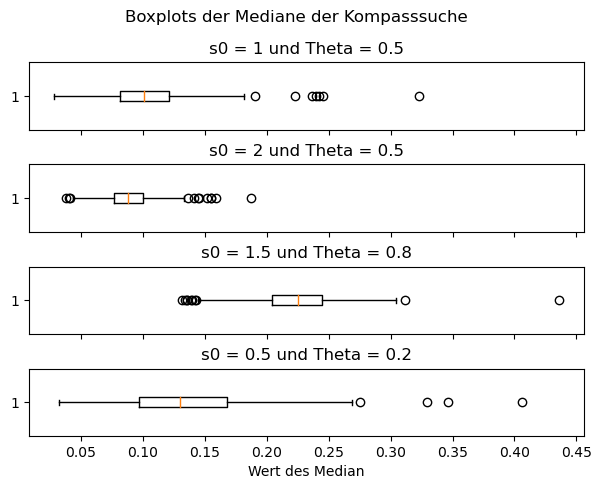

In [8]:
fig, ax = plt.subplots(4, sharex=True)
fig.suptitle('Boxplots der Mediane der Kompasssuche')
fig.tight_layout(pad=1.5)
plt.xlabel('Wert des Median')
ax[0].set_title('s0 = 1 und Theta = 0.5')
ax[0].boxplot(medians[:500], vert=False)#
ax[1].set_title('s0 = 2 und Theta = 0.5')
ax[1].boxplot(medians[500:1000], vert=False)
ax[2].set_title('s0 = 1.5 und Theta = 0.8')
ax[2].boxplot(medians[1000:1500], vert=False)
ax[3].set_title('s0 = 0.5 und Theta = 0.2')
ax[3].boxplot(medians[1500:2000], vert=False)

### Interpretation

Das Zentrum des Plots der Parameter $(2)$ liegt am weitesten links. Daher scheint die Optimierung mit diesen Parametern im Mittel am schnellsten zu sein. Außerdem ist die Streungung der Werte geringer, als die der anderen Parameterkombinationen. Ein bisschen langsamer scheint die Kombination $(1)$, außerdem liegt eine höhere Streuung vor und es gibt größere Ausreißerpunkte. An dritter Stelle liegt die Kombination $(4)$, die ein gutes Stück langsamer scheint als $(1)$. Die Streuung ist hier am größten, dafür gibt es nicht so viele Ausreißer. Die Langsamste Parameterkombination ist hier $(3)$. <br>
Die Verkleinerung von $\theta = 0.8$ scheint zu klein für die initiale Schrittgröße von $s_0 = 1.5$ zu sein. $\theta = 0.5$ führt schneller zur Konvergenz selbst bei Schrittgrößen $s_0 = 1$ und $s_0 = 2$. <br>
Die initiale Schrittgröße von $s_0 = 0.5$ scheint etwas zu klein zu sein, da sie hier langsamer konvergiert als eine größere Schrittgröße mit entsprechendem Reduktionsfaktor $\theta$.

### Tests

$(i) \space \space H_0: \mu_0 \ge \mu_1 \space \space vs. \space \space H_1: \mu_0 < \mu_1$ 

In [24]:
# Welch-Test
welch_val, welch_pval = ttest_ind(medians[:500], medians[1000:1500], alternative='less', equal_var=False)
welch_reject_h0 = welch_pval < 0.05

# Wilcoxon-Test
wil_val, wil_pval = ranksums(medians[:500], medians[1000:1500], alternative='less')
wil_reject_h0 = wil_pval < 0.05

In [29]:
print(f'Test:\t\tStatistik:\t\tP-Wert:\t\t\t\tH_0 verwerfen:')
print(f'Welch\t\t{welch_val : .2f}\t\t\t{welch_pval}\t\t\t\t{welch_reject_h0}')
print(f'Wilcoxon\t{wil_val : .2f}\t\t\t{wil_pval}\t\t{wil_reject_h0}')

Test:		Statistik:		P-Wert:				H_0 verwerfen:
Welch		-59.94			0.0				True
Wilcoxon	-26.76			4.380705988221099e-158		True


Bei einem Signifikanzniveau $\alpha = 0.05$ verwerfen die beiden Tests die Nullhypothese $H_0$. <br> Somit können wir zum Signifikanzniveau von $5$% sagen, dass die Kompasssuche mit $s_0=1$ und $\theta = 0.5$ im Mittel weniger Zeit benötigt, als die Kompasssuche mit $s_0 = 1.5$ und $\theta = 0.8$

$(ii) \space \space H_0: \mu_0 \ge \mu_1 \space \space vs. \space \space H_1: \mu_0 < \mu_1$ 

In [30]:
# Welch-Test
welch_val, welch_pval = ttest_ind(medians[1000:1500], medians[1500:2000], alternative='less', equal_var=False)
welch_reject_h0 = welch_pval < 0.05

# Wilcoxon-Test
wil_val, wil_pval = ranksums(medians[1000:1500], medians[1500:2000], alternative='less')
wil_reject_h0 = wil_pval < 0.05

In [33]:
print(f'Test:\t\tStatistik:\t\tP-Wert:\t\tH_0 verwerfen:')
print(f'Welch\t\t{welch_val : .2f}\t\t\t{welch_pval}\t\t{welch_reject_h0}')
print(f'Wilcoxon\t{wil_val : .2f}\t\t\t{wil_pval}\t\t{wil_reject_h0}')

Test:		Statistik:		P-Wert:		H_0 verwerfen:
Welch		 32.71			1.0		False
Wilcoxon	 23.54			1.0		False


Bei einem Signifikanzniveau $\alpha = 0.05$ verwirft keiner der beiden Tests die Nullhypothese $H_0$. <br> Somit können wir zum Signifikanzniveau von $5$% nicht sagen, dass die Kompasssuche mit $s_0=1.5$ und $\theta = 0.8$ im Mittel weniger Zeit benötigt, als die Kompasssuche mit $s_0 = 0.5$ und $\theta = 0.2$

$(iii) \space \space H_0: \mu_0 \ge \mu_1 \space \space vs. \space \space H_1: \mu_0 < \mu_1$ 

In [35]:
# Welch-Test
welch_val, welch_pval = ttest_ind(medians[500:1000], medians[1000:1500], alternative='less', equal_var=False)
welch_reject_h0 = welch_pval < 0.05

# Wilcoxon-Test
wil_val, wil_pval = ranksums(medians[500:1000], medians[1000:1500], alternative='less')
wil_reject_h0 = wil_pval < 0.05

In [37]:
print(f'Test:\t\tStatistik:\t\tP-Wert:\t\t\t\tH_0 verwerfen:')
print(f'Welch\t\t{welch_val : .2f}\t\t\t{welch_pval}\t\t\t\t{welch_reject_h0}')
print(f'Wilcoxon\t{wil_val : .2f}\t\t\t{wil_pval}\t\t{wil_reject_h0}')

Test:		Statistik:		P-Wert:				H_0 verwerfen:
Welch		-82.35			0.0				True
Wilcoxon	-27.34			6.640469010974758e-165		True


Bei einem Signifikanzniveau $\alpha = 0.05$ verwerfen die beiden Tests die Nullhypothese $H_0$. <br> Somit können wir zum Signifikanzniveau von $5$% sagen, dass die Kompasssuche mit $s_0=2$ und $\theta = 0.5$ im Mittel weniger Zeit benötigt, als die Kompasssuche mit $s_0 = 1.5$ und $\theta = 0.8$

$(iv) \space \space H_0: \mu_0 \ge \mu_1 \space \space vs. \space \space H_1: \mu_0 < \mu_1$ 

In [39]:
# Welch-Test
welch_val, welch_pval = ttest_ind(medians[:500], medians[1500:2000], alternative='less', equal_var=False)
welch_reject_h0 = welch_pval < 0.05

# Wilcoxon-Test
wil_val, wil_pval = ranksums(medians[:500], medians[1500:2000], alternative='less')
wil_reject_h0 = wil_pval < 0.05

In [42]:
print(f'Test:\t\tStatistik:\t\tP-Wert:\t\t\t\tH_0 verwerfen:')
print(f'Welch\t\t{welch_val : .2f}\t\t\t{welch_pval}\t\t{welch_reject_h0}')
print(f'Wilcoxon\t{wil_val : .2f}\t\t\t{wil_pval}\t\t{wil_reject_h0}')

Test:		Statistik:		P-Wert:				H_0 verwerfen:
Welch		-11.27			8.776809992122122e-28		True
Wilcoxon	-10.32			2.891899544266253e-25		True


Bei einem Signifikanzniveau $\alpha = 0.05$ verwerfen die beiden Tests die Nullhypothese $H_0$. <br> Somit können wir zum Signifikanzniveau von $5$% sagen, dass die Kompasssuche mit $s_0=1$ und $\theta = 0.5$ im Mittel weniger Zeit benötigt, als die Kompasssuche mit $s_0 = 0.5$ und $\theta = 0.2$

Die beiden Tests haben alle "Entscheidungen" identisch getroffen, allerdings haben sich die P-Werte ein wenig von einander Unterschieden. Diese Unterschiede waren aber so minimal, dass es zu keinen unterschiedlichen Entscheidungen geführt hat. Die Schlussfolgerungen, die sich hier ergeben sind: <br>
$(1)$ ist schneller als $(3)$ <br>
Über $(3)$ und $(4)$ können wir keine Aussage machen, außer das wir uns nicht sicher sind, ob $(3)$ schneller als $(4)$ ist <br>
$(2)$ ist schneller als $(3)$ <br>
$(1)$ ist schneller als $(4)$ <br>

Diese Erkenntnisse stimmen mit denen der Boxplots überein, denn die Zentren der Boxplots von $(1)$ und $(2)$ liegen weiter links als die von $(3)$ und $(4)$ und sind somit im Mittel schneller als $(3)$ und $(4)$. Das Zentrum des $(3)$ Plots liegt ein gutes Stück rechts von $(4)$ und ist somit im Mittel nicht schneller als $(4)$.

### Annahmen Welch-Test
- Normalverteilung der Grundgesamtheit
- Ungleiche Varianz der Verteilungen

### Annahmen Wilcoxon-Test
- $D_i = X_{i,1} - X_{i,2}$ unabhängig, identisch verteilt, stetig und symmetrisch

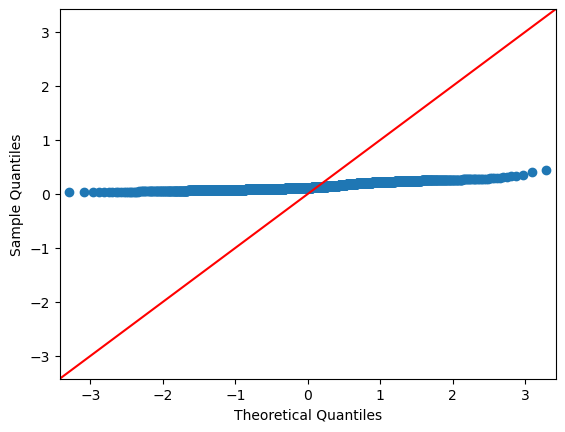

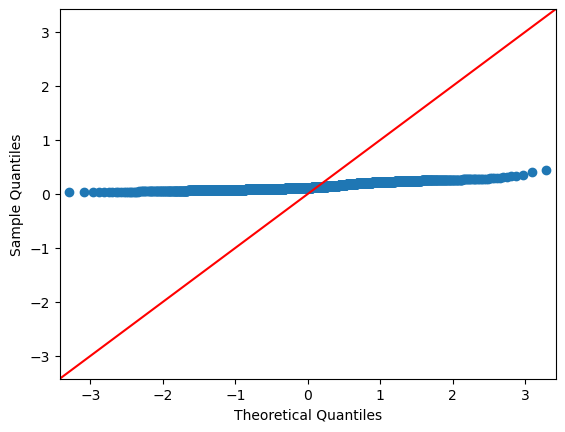

In [46]:
sm.qqplot(medians, line='45')

### Aufgabe 3.2
Es gilt $\theta = \theta_0$. <br> 
Außerdem gilt, dass $H_0$ für ein $\theta \ne \theta_0$ mit einer Wahrscheinlichkeit von maximal $\alpha$ verworfen wird.<br>
__1. Option:__ <br>
$\Rightarrow \space$ für ein belibiges $\epsilon > 0$ gilt, $G_\varphi(\theta - \epsilon) \leq \alpha$ und $G_\varphi(\theta + \epsilon) \leq \alpha$. <br>
Da $G_\varphi$ stetig ist, gilt also auch $G_\varphi(\theta) \leq \alpha$ <br>

__2. Option:__ <br>
$\Rightarrow \space \lim_{\theta \downarrow \theta_0} \le \alpha$ und $\lim_{\theta \uparrow \theta_0} \le \alpha$ <br> 
$ \Rightarrow G_\varphi(\theta) \le \alpha$, denn $G_\varphi$ ist stetig.<br> <br>

Inhaltlich bedeutet das, dass die Gütefunktion auf den Intervallen $\theta < \theta_0$ und $\theta > \theta_0$ den Wert $\alpha$ nicht überschreitet (Def. Signifikanzniveau). Um also an der Stelle $\theta = \theta_0$ einen größeren Wert annehmen zu können, müsste die Funktion an der Stelle einen Sprung machen. Da diese aber immer stetig ist, ist das nicht möglich. Man kann also keinen Test konstruieren, dessen Gütefunktion in genau einem Punkt einen hohen Wert (nahe $1.0$) annimmt und in allen anderen Werten unterhalb des Signifikantsniveaus $\alpha$ bleibt.

### Aufgabe 3.3

$(a)$ Nein, da stets nur eine signifikante Aussage getroffen werden kann, wenn $H_0$ verworfen wird. Ist dies der Fall, kann man sich sicher sein, dass die Stichprobe unter Annahme $H_0$ sehr unwahrscheinlich ist. Wird $H_0$ nicht verworfen heißt dies aber noch nicht, dass $H_0$ wahrscheinlich richtig ist. <br> <br>
$(b)$ Nein. Die Stichprobe wird nicht verworfen, also ist keine signifikante Aussage über die Hypothesen möglich, außerdem liegt der p-wert von $0.08$ nur knapp über dem Signifikanzniveau von $0.05$, also ist diese Stichprobe unter Annahme einer Normalverteilung immernoch recht unwahrscheinlich. Auch hier kann man sich nicht sicher sein, dass die Stichprobe normalverteilt ist, da der Test die Nullhypothese nicht verworfen hat.  <br> <br>
$(c)$ Nein. Die Signifikanz einer Aussage trifft keinerlei Aussage über die Relevanz einer Aussage. Ein Beispiel hierfür wäre der Vergleich von zwei objektiv schlechten Algorithmen. Trifft man eine signifikante Aussage darüber, dass Algorithmus A schneller ist als Algorithmus B, aber es ist bekannt das Algorithmus C deutlich schneller ist als A und B, so hat diese Aussage keine wirkliche Relevanz.